### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [1]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt

1. display 5 columns from dataset

In [74]:
df= pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv")
df.head()


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [4]:
#2
df.info()

#conclusion
#Dataset ini terdiri dari 6,194 entri dengan 10 kolom, di mana beberapa kolom memiliki data yang hilang, seperti kolom race dengan 1,842 nilai hilang dan kolom admission yang hanya memiliki 1,000 nilai,
#sehingga 5,194 entri tidak memiliki data penerimaan. Kolom lainnya seperti application_id, gender, international, gpa, major, gmat, work_exp, dan work_industry tidak memiliki data yang hilang.
#Dataset ini mencakup berbagai tipe data, termasuk integer, boolean, float, dan object (kategori).
#Penting untuk menangani data hilang ini, terutama pada kolom admission yang mayoritas tidak terisi, untuk mencegah pengaruh negatif pada analisis atau model yang akan dibangun.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [5]:
admission_nan = df[df['admission'].isna()]
admission_admit = df[df['admission'] == 'Admit']
admission_waitlist = df[df['admission'] == 'Waitlist']

# Display the number of results
print("NaN:", admission_nan.shape[0])
print("Admit:", admission_admit.shape[0])
print("Waitlist:", admission_waitlist.shape[0])

NaN: 5194
Admit: 900
Waitlist: 100


In [7]:
race_nan = df[df['race'].isna()]
race_White = df[df['race'] == 'White']
race_Asian = df[df['race'] == 'Asian']
race_Black = df[df['race'] == 'Black']
race_Hispanic = df[df['race'] == 'Hispanic']
race_Other = df[df['race'] == 'Other']

# Display the number of results
print("NaN:", race_nan.shape[0])
print("Admit:", race_White.shape[0])
print("Asian:", race_Asian.shape[0])
print("Black:", race_Black.shape[0])
print("Hispanic:", race_Hispanic.shape[0])
print("Other:", race_Other.shape[0])

NaN: 1842
Admit: 1456
Asian: 1147
Black: 916
Hispanic: 596
Other: 237


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [75]:
#4
df['admission'].fillna('deny', inplace=True)

# Fill NaN values in 'race' with 'other'
df['race'].fillna('other', inplace=True)

<ipython-input-75-413717518dd3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('deny', inplace=True)
<ipython-input-75-413717518dd3>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

5. recheck missing value

In [10]:
#5
df.isna().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [76]:
# 6
dfdrop = df.drop('application_id', axis=1, inplace=True)

dfdrop

7. show describe column and conclude what the insight is from that column

In [22]:
#7
a = df.describe()
a
#conclusion

#Berdasarkan statistik deskriptif untuk kolom gpa, gmat, dan work_exp, rata-rata nilai GPA adalah 3.25 dengan rentang antara 2.65 hingga 3.77,
#menunjukkan bahwa sebagian besar nilai GPA berada dalam kisaran yang relatif dekat. Rata-rata skor GMAT mencapai 651.09, dengan rentang dari 570 hingga 780, dan variasi skor cukup besar dengan standar deviasi 49.29.
#Sementara itu, rata-rata pengalaman kerja adalah 5.02 tahun, berkisar antara 1 hingga 9 tahun, di mana mayoritas pelamar memiliki pengalaman antara 4 hingga 6 tahun.
#Secara keseluruhan, data ini mencerminkan bahwa pelamar umumnya memiliki GPA yang tinggi, skor GMAT yang bervariasi, dan pengalaman kerja yang signifikan.

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

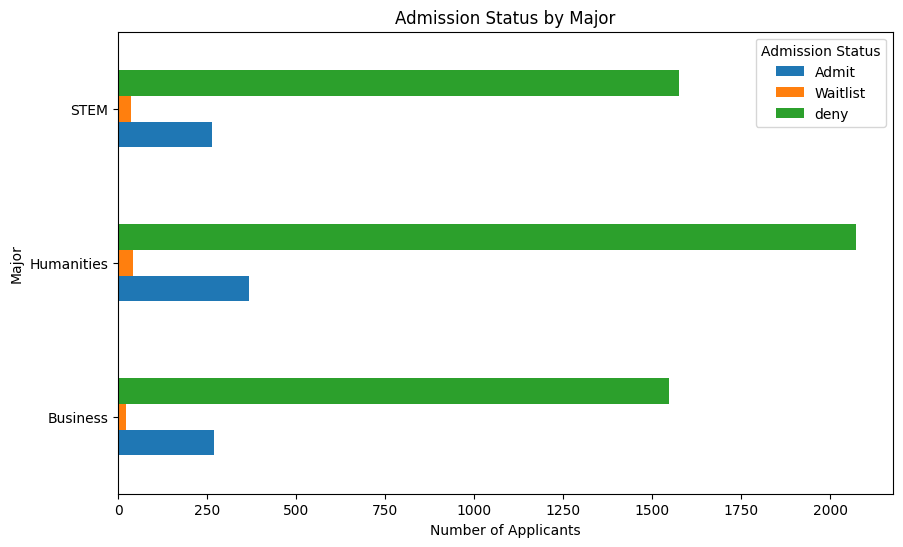

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
df['admission'].fillna('deny', inplace=True)

# Count admission status based on major
count_admission_by_major = df.groupby(['major',
'admission'])['admission'].count().unstack()

count_admission_by_major.plot (kind='barh', figsize=(10,6))
plt.title('Admission Status by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Admission Status')
plt.show()

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

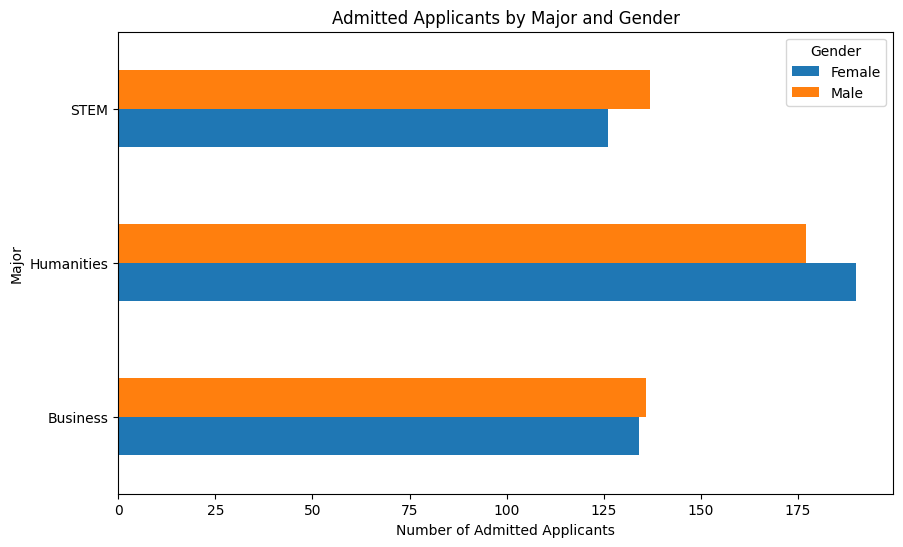

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
df_admit = df[df['admission'] == 'Admit']

# Count admitted applicants based on major and gender
count_admission_by_major = df_admit.groupby(['major', 'gender'])['gender'].count().unstack()

# Plotting
count_admission_by_major.plot(kind='barh', figsize=(10, 6))
plt.title('Admitted Applicants by Major and Gender')
plt.xlabel('Number of Admitted Applicants')
plt.ylabel('Major')
plt.legend(title='Gender')
plt.show()

10. create your own insightful visualization and explain it in at least 2 sentences

<ipython-input-60-db6317dc52f6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('deny', inplace=True)


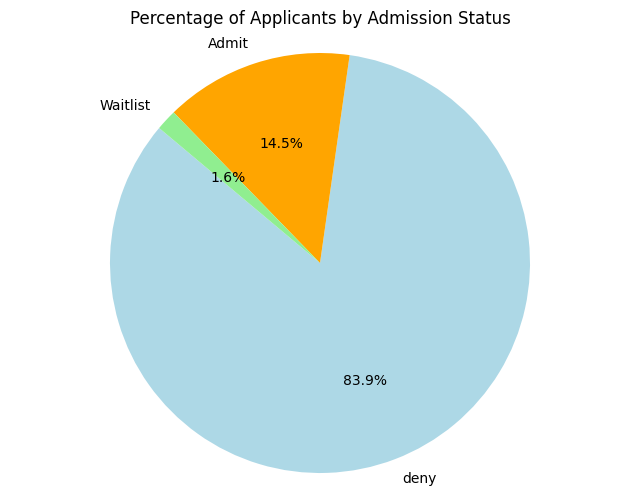

In [60]:
#10
df= pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv")
df['admission'].fillna('deny', inplace=True)

# Count the number of applicants in each admission category
admission_counts = df['admission'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(admission_counts, labels=admission_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'orange', 'lightgreen'])
plt.title('Percentage of Applicants by Admission Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

#Berdasarkan pie chart tersebut, mayoritas pendaftar mengalami penolakan. Hanya 14,5% dari total pendaftar yang berhasil diterima.

11. create your own insightful visualization and explain it in at least 2 sentences

<ipython-input-63-4f794806f324>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('deny', inplace=True)


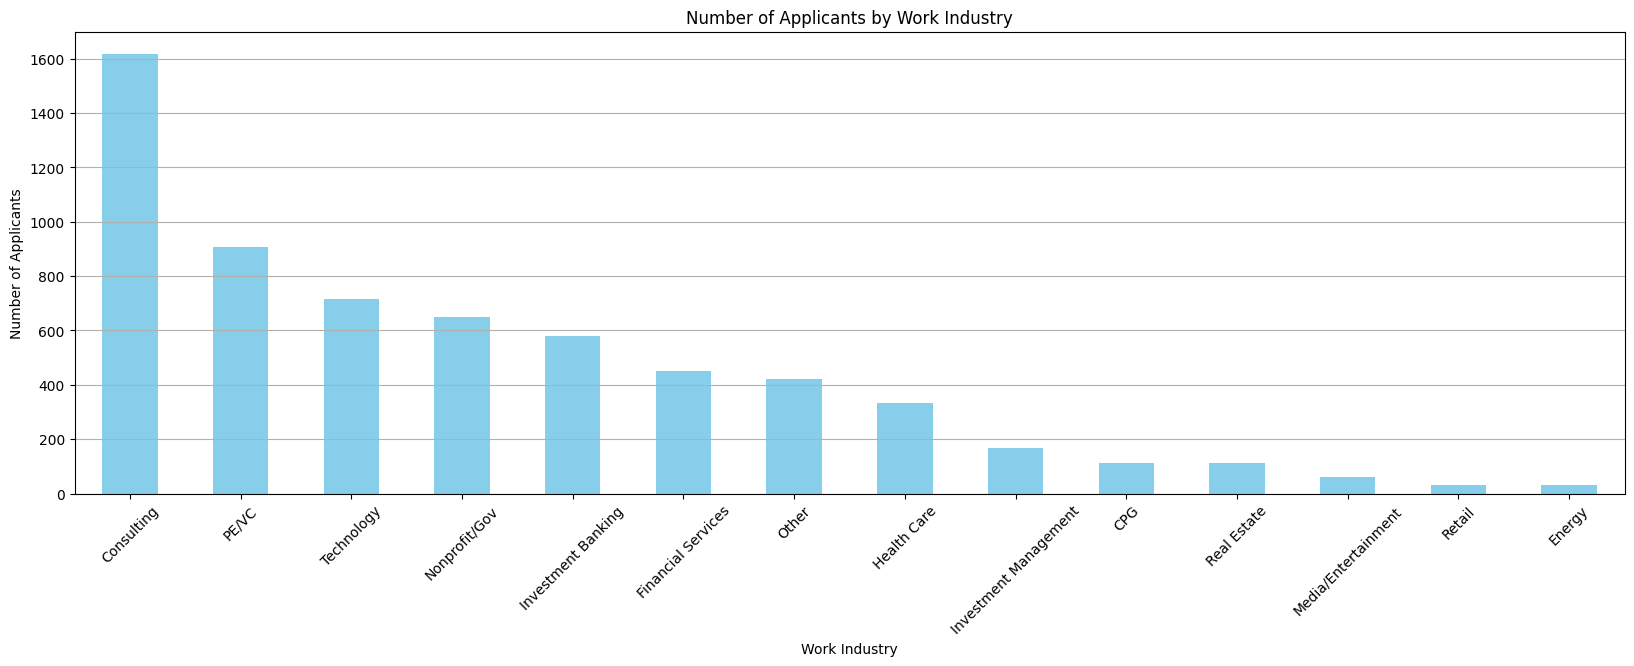

In [63]:
df= pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv")
df['admission'].fillna('deny', inplace=True)

# Count the number of applicants in each work industry
work_industry_counts = df['work_industry'].value_counts()

# Create a bar chart
plt.figure(figsize=(20, 6))
work_industry_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Applicants by Work Industry')
plt.xlabel('Work Industry')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines for easier reading of values
plt.show()
#Berdasarkan bar chart tersebut, terlihat bahwa sebagian besar pendaftar berasal dari latar belakang konsultan. Pendaftar paling dikit berasal dari latar belakang pekerjaan energi

12. encode categorical columns and display the results

In [78]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['gender'] = encoder.fit_transform(df['gender'])
df['international'] = encoder.fit_transform(df['international'])
df['major'] = encoder.fit_transform(df['major'])
df['race'] = encoder.fit_transform(df['race'])
df['work_exp'] = encoder.fit_transform(df['work_exp'])
df['work_industry'] = encoder.fit_transform(df['work_industry'])

df.head()


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,Admit
1,1,0,3.28,1,1,680.0,4,6,deny
2,0,1,3.30,0,5,710.0,4,13,Admit
3,1,0,3.47,2,1,690.0,5,13,deny
4,1,0,3.35,2,2,590.0,4,1,deny


In [79]:
#12b
#encode y
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['admission'] = encoder.fit_transform(df['admission'])
df['admission'] = df['admission'].replace({2: 1})
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,0
1,1,0,3.28,1,1,680.0,4,6,1
2,0,1,3.30,0,5,710.0,4,13,0
3,1,0,3.47,2,1,690.0,5,13,1
4,1,0,3.35,2,2,590.0,4,1,1


13. create a heatmap to see the correlation and explain the conclusion

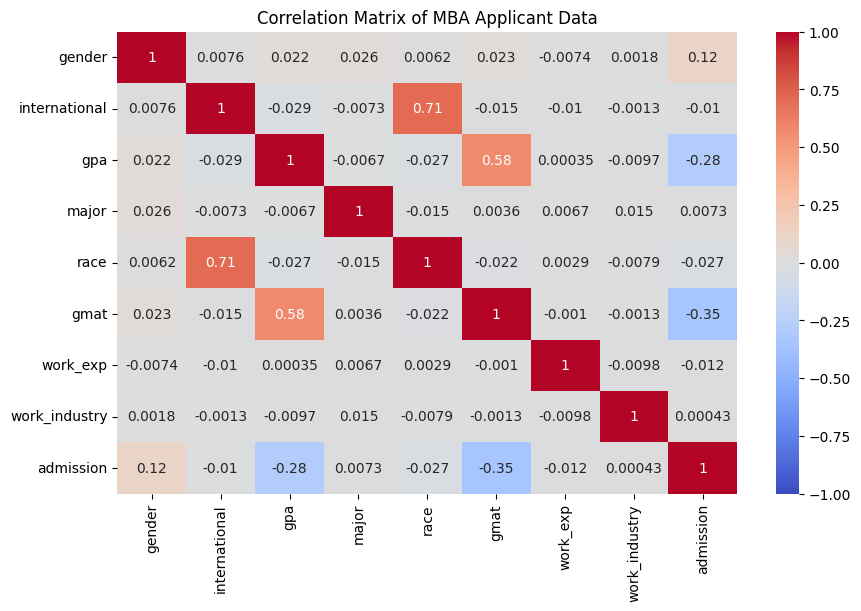

In [80]:
import seaborn as sns
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Correlation Matrix of MBA Applicant Data')

plt.show()
#Matriks korelasi ini menunjukkan beberapa hubungan penting antara variabel-variabel dalam data pelamar MBA.
#Terdapat korelasi positif yang moderat antara GMAT dan GPA (0.58), menunjukkan bahwa pelamar dengan GPA yang lebih tinggi cenderung memiliki skor GMAT yang lebih tinggi.
#Namun, baik GMAT (-0.35) maupun GPA (-0.28) memiliki korelasi negatif dengan status penerimaan, yang menunjukkan bahwa nilai-nilai tersebut tidak selalu menjamin penerimaan.
#Hubungan yang kuat antara ras dan status internasional (0.71) juga menunjukkan adanya hubungan antara keberagaman pelamar internasional.
#Selain itu, faktor seperti pengalaman kerja dan industri kerja tidak menunjukkan pengaruh signifikan terhadap keputusan penerimaan, yang mungkin menunjukkan bahwa faktor-faktor ini kurang dipertimbangkan dalam proses seleksi.
# Matriks ini membantu mengidentifikasi faktor-faktor yang mungkin memerlukan analisis lebih lanjut dalam memahami pola penerimaan.

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x = df[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry']]
y = df['admission']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
hasil = accuracy * 100
print("Accuracy of the model:", hasil)

mean = df['gpa'].mean()
# print(mean)
predicted_role_encoded = clf.predict([[0,0,mean,0,0,580,2,3]])
predicted_role = encoder.inverse_transform(predicted_role_encoded)

print(f"Predicted role for the character: {predicted_role[0]}")

Accuracy of the model: 80.95238095238095
Predicted role for the character: Waitlist


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
